<h2>Data Exploration</h2>

In this experiment we want to establish a relationship between "Brain weight" and "Head Size" with simple linear regression

In [2]:
# import all the required modeules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# load the data 
data = pd.read_csv('./headbrain.txt')
print(data.shape)

(237, 4)


In [3]:
print(data.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


As you can see there are 237 values in the training set. We will find a linear relationship between Head Size and Brain Weights. So, now we will get the values only for these variables.

In [6]:
# getting the values for X and y

X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [7]:
print(X[:5]) 
print(Y[:5])

[4512 3738 4261 3777 4177]
[1530 1297 1335 1282 1590]


<h2>Finding Coefficients</h2>

To find the values β1 and β0, we will need mean of X and Y. We will find these and the coeffients.

In [8]:
#Mean of X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m = len(X)

#Using the formula to calculate b1 and b2
number = 0
denom = 0
for i in range(m):
    number += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = number / denom
b0 = mean_y - (b1*mean_x)

#print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


BrainWeight=325.573421049+0.263429339489∗HeadSize

It represents for every 1 cm^3 of headsize, the brain weight is 0.26g 

This is our Linear Value

<h2>Plotting a Graphs</h2>

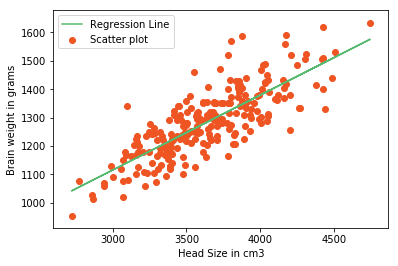

In [9]:
# plotting values in regression line

y_pred = b0 + b1 * X

#plotting line 
plt.plot(X, y_pred, color='#58b970', label='Regression Line')

#plotting scatter plot
plt.scatter(X, Y, c='#ef5423', label='Scatter plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

<h2>Find the Root Mean Square</h2>

Root Mean Squared Error is the square root of sum of all errors divided by number of values, or Mathematically,

In [11]:
#calculating Root Mean Square Error

rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


<h2>Find the R^2 value</h2>

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression

SSt
  is the total sum of squares and SSr
 is the total sum of squares of residuals.

R2
 Score usually range from 0 to 1 (0% - 100%). It will also become negative if the model is completely wrong. Now we will find R2
 Score.

In [12]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


0% - represents the model doesnot explain any of the variance in the response variable around the mean
100% - represnets the model explains all the variation in the response variable around its mean

R^2 between 85 - 100% generally a good fit for the model